## TP Logistic Regression

In this notebook, we will study the Iris dataset, a well known Machine Learning dataset. It contains features allowing to classify different species of flowers. We will use a logistic regression method. Even if it is considered as an over simplistic model in the DataScience world, it is the foundation of more complex state-of-the-art Machine learning models, such as Neural Networks.

Once again, a lot of the utilities used are from Sklearn.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline


First, we load the dataset :

In [2]:
df = pd.read_csv('data/iris-data.csv')

In [3]:
df.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [4]:
df.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Question 1:

Remove rows with null values to get a clean dataset.

In [6]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


There is a small number of features. The good practice in this case is to use the pairplot method from seaborn : it will give use insight about data with very limited effort.

/anaconda3/envs/kaif-env/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/envs/kaif-env/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


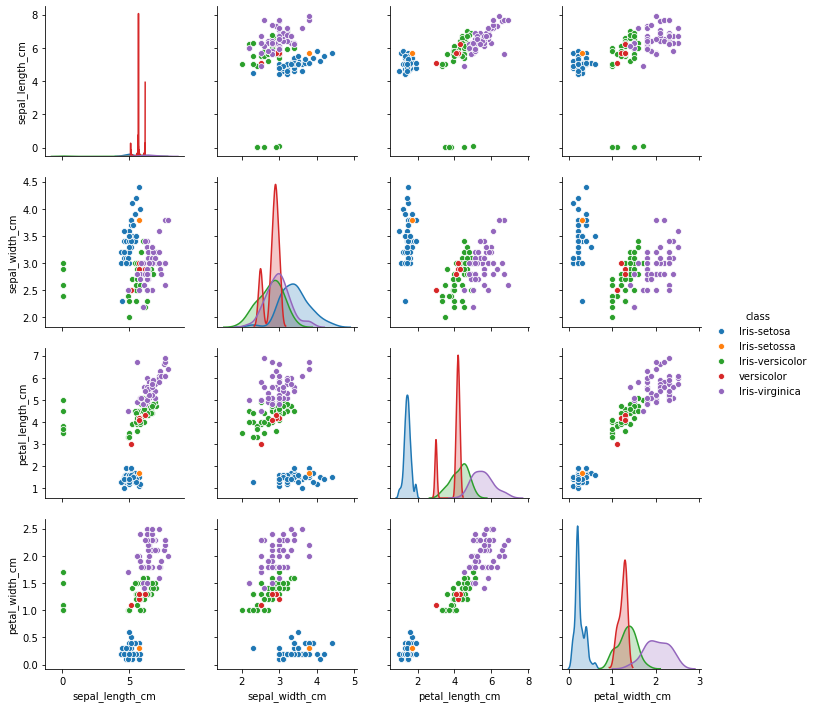

In [7]:
sns.pairplot(df, hue='class', height=2.5)

From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [8]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

### Question 2:

Replace the miss spelled names to get a clean dataset with only 3 different labels.

In [9]:
df['class'].replace(["Iris-setossa", "versicolor"], ["Iris-setosa", "Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

# Simple Logistic Regression

We will code a binary logistic regression. For this part, we consider only two class 'Iris-setosa' and 'Iris-versicolor', and drop all other classes (Iris-virginica in our case).

In [10]:
final_df = df[df['class'] != 'Iris-virginica']

In [11]:
final_df.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

# Outlier Check

A logistic regression model is very sensitive to outliers. It is very important to filter them. Let's first do a visual check.

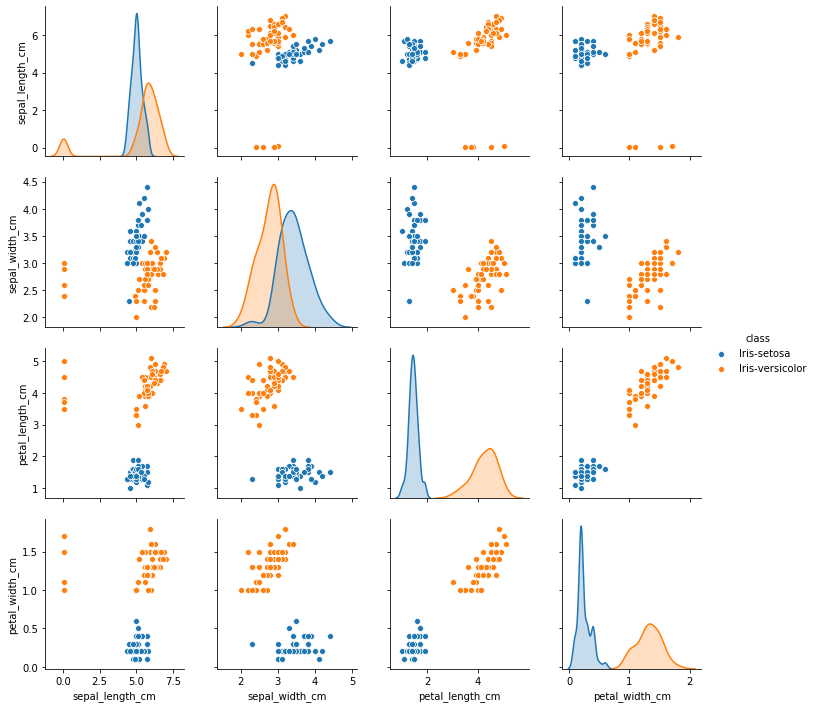

In [12]:
sns.pairplot(final_df, hue='class', height=2.5)

From the above plot, sepal_width and sepal_length seem to have outliers. To confirm let's plot them seperately.

### Question 3:

Plot an histogram showing the repartition of the feature sepal_lenght. Then, choose a threshold and filter the data you consider as outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a268d3750>]],
      dtype=object)

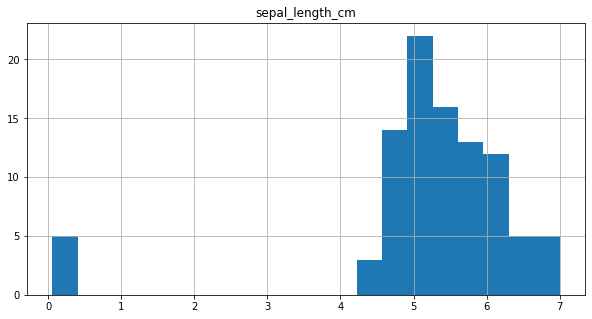

In [13]:
final_df.hist(column='sepal_length_cm', bins=20, figsize=(10, 5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

/anaconda3/envs/kaif-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a268eab10>]],
      dtype=object)

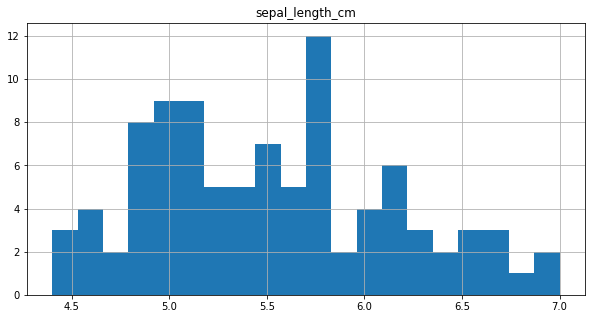

In [14]:
final_df['sepal_length_cm'] = final_df['sepal_length_cm'].apply(lambda x: x * 100 if x < 1 else x)
final_df.hist(column='sepal_length_cm', bins=20, figsize=(10, 5))

### Question 4:

Repeat for sepal width. Be careful, you might want to take the class into account to correctly identify outliers.

In [15]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

Let's replot the pairplot now that the outliers have been removed :

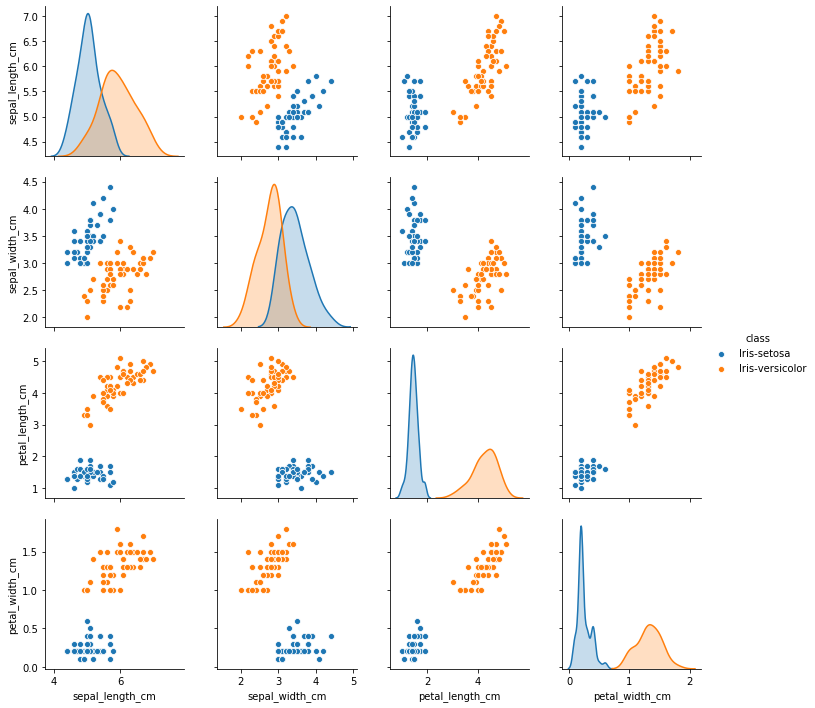

In [16]:
sns.pairplot(final_df, hue='class', height=2.5)

Successfully removed outliers!!

The classification problem now seems easier since the class domains are not overlapping.

# Label Encoding

We encode the label to numerical values.

In [17]:
final_df['class'].replace(["Iris-setosa", "Iris-versicolor"], [1, 0], inplace=True)

In [18]:
final_df.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  class
0              5.1             3.5              1.4             0.2      1
1              4.9             3.0              1.4             0.2      1
2              4.7             3.2              1.3             0.2      1
3              4.6             3.1              1.5             0.2      1
4              5.0             3.6              1.4             0.2      1

# Model Construction

First we split the data into features and labels and create a train and a test split.

In [19]:
final_df.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  class
0              5.1             3.5              1.4             0.2      1
1              4.9             3.0              1.4             0.2      1
2              4.7             3.2              1.3             0.2      1
3              4.6             3.1              1.5             0.2      1
4              5.0             3.6              1.4             0.2      1

In [20]:
X = final_df.drop(columns='class')
y = final_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values


In [21]:
print('Input Shape', X_train.shape)
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


We create a function to initialize the weights and bias.

In [22]:
def weightInitialization(n_features):
    w = np.zeros((1, n_features))
    b = 0
    return w, b

### Question 5:

Complete the following function to compute the sigmoid activation.

In [23]:
def sigmoid_activation(result):
    final_result = 1 / (1 + np.exp(-result))
    return final_result

### Question 6:

The following function computes the cost and gradient of weights and bias from the current X,y, weights and bias. Complete it.

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(X^{(i)}) - y^{(i)}).X_j^{(i)}
\end{equation}
where
\begin{equation}
h_\theta(X) = \sigma(\theta^TX)
\end{equation}


In [24]:
def model_optimize(w, b, X, y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    cost = (-1 / m)*(np.sum((y.T * np.log(final_result)) + ((1 - y.T) * (np.log(1 - final_result)))))
    
    #Gradient calculation
    dw = (1 / m) * (np.dot(X.T, (final_result - y.T).T))
    db = (1 / m) * (np.sum(final_result - y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

### Question 7:

Now we need to iterate for the gradient descent process. Complete this fucntion which uses model_optimize. The costs list should contain an historic of te costs accross the iterations.

In [25]:
def gradient_descent(w, b, X, y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        
        if (i % 100 == 0):
            costs.append(cost)
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

The following predict function is essentially a threshold allowing us to get the predicted labels.

In [26]:
def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > .5:
            y_pred[0][i] = 1
    return y_pred

Now that we have all the necessary tools, let's compute the result !

### Question 8:

Use the previously implemented functions to find the ideal weights and biais for our logisitic regression model. You should then compute the predictions on the training and test sets. Are the results as expected ?

In [27]:
#Get number of features
n_features = X_train.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = gradient_descent(w, b, X_train, y_train, learning_rate=.0001, no_iterations=4500)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

final_train_pred = sigmoid_activation(np.dot(w, X_train.T) + b)
final_test_pred = sigmoid_activation(np.dot(w, X_test.T) + b)

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]

y_train_pred = predict(final_train_pred, m_train)
print('Training Accuracy', accuracy_score(y_train_pred.T, y_train))

y_test_pred = predict(final_test_pred, m_test)
print('Test Accuracy', accuracy_score(y_test_pred.T, y_test))


Number of Features 4
Optimized weights [[-0.13003456  0.13594345 -0.18309061 -0.18165558]]
Optimized intercept -0.02554029657487308
Training Accuracy 1.0
Test Accuracy 1.0


As we saw on the pairplots, the domains are not overlapping, it is expected for a well tuned model to have a 100% accuracy.

### Question 9:

Plot the costs over the iterations.

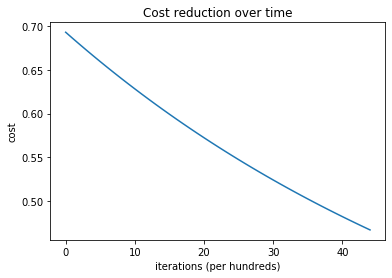

In [28]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

## Comparison with Sklearn

As for all the common Machine Learning models, sklearn contains an API for the Logistic Regression. It is well optimized and very easy to use.

In [29]:
from sklearn.linear_model import LogisticRegression

### Question 10:

Using sklearn's documentation, use the LogisticRegression model. You should fit it and predict with it. Are the weights and intercept similar to the ones we found ? Also compare the accuracy.

In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train, y_train)

/anaconda3/envs/kaif-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print (clf.intercept_, clf.coef_)

[-0.45224856] [[-0.64221638  1.20452609 -1.38294295 -1.44785239]]


In [33]:
pred = clf.predict(X_test)

In [34]:
print ('Accuracy from sklearn: {0}'.format(clf.score(X_test, y_test)))

Accuracy from sklearn: 1.0
